# 資産レポート

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/ubuntu/repo/bakuchi


In [2]:
import src.utils.asset as tool

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [5]:
bt_df = tool.read_asset("bitbank")
ex2_df = tool.read_asset("liquid")
total_df = tool.read_asset_total()

In [6]:
len(bt_df), len(ex2_df), len(total_df)

(149, 149, 149)

In [7]:
# ex1_df.head(3)

In [8]:
total_df["datetime"] = total_df.index
total_df["year"] = total_df.index.year
total_df["date"] = total_df.index.strftime('%Y-%m-%d')
total_df["year_and_month"] = total_df.index.strftime('%Y-%m')
total_df["year_and_wom"] = total_df.index.strftime('%Y-W%W')

## 日次レポート

In [9]:
df_day = total_df.tail(24)
df_day.drop(["datetime", "date", "year_and_month", "year_and_wom", "year"], axis=1).tail(12)

,jpy,btc,btc_as_jpy,total_jpy
timestamp,,,,
2021-04-20 21:00:05,17505,0.0017,10416,27921
2021-04-20 22:00:05,17505,0.0017,10332,27837
2021-04-20 23:00:04,17505,0.0017,10404,27909
2021-04-21 00:00:05,17505,0.0017,10203,27708
2021-04-21 01:00:04,17505,0.0017,10198,27703
2021-04-21 02:00:04,17505,0.0017,10275,27780
2021-04-21 03:00:04,17505,0.0017,10297,27802
2021-04-21 04:00:04,17505,0.0017,10354,27859
2021-04-21 05:00:04,17505,0.0017,10409,27914


<AxesSubplot:xlabel='datetime', ylabel='total_jpy'>

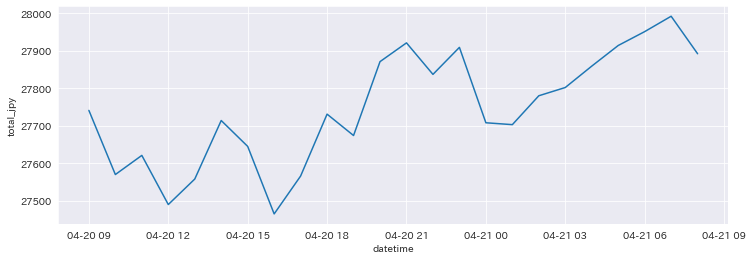

In [10]:
sns.lineplot(data=df_day, x='datetime', y="total_jpy")

<AxesSubplot:xlabel='datetime', ylabel='total_jpy'>

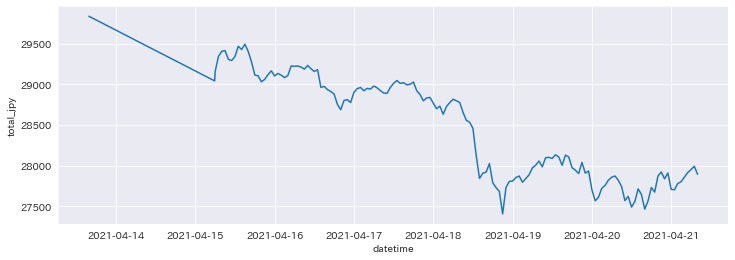

In [11]:
df_recent = total_df.tail(24*10)
sns.lineplot(data=df_recent, x='datetime', y="total_jpy")

In [12]:
groupby = df_recent.groupby("date")
df_days = pd.DataFrame()
df_days["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [13]:
df_days.tail(10)

,total_jpy
date,
2021-04-13,29836.000
2021-04-15,29260.579
2021-04-16,29035.167
2021-04-17,28940.750
2021-04-18,28286.667
2021-04-19,27980.667
2021-04-20,27710.083
2021-04-21,27844.556


<AxesSubplot:xlabel='date', ylabel='total_jpy'>

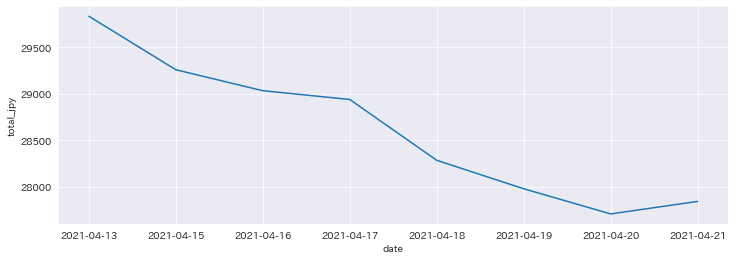

In [14]:
df_days["date"] = df_days.index
sns.lineplot(data=df_days, x='date', y='total_jpy')

## 週次レポート

In [15]:
groupby = total_df.groupby('year_and_wom')
df_by_week = pd.DataFrame()
df_by_week["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [16]:
df_by_week

,total_jpy
year_and_wom,
2021-W15,28870.533
2021-W16,27845.246


<AxesSubplot:xlabel='year_and_wom', ylabel='total_jpy'>

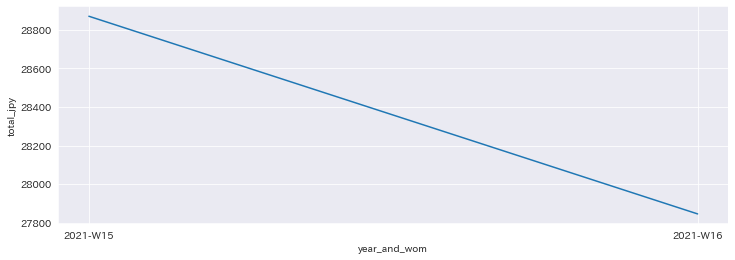

In [17]:
df_by_week["year_and_wom"] = df_by_week.index
sns.lineplot(data=df_by_week, x='year_and_wom', y='total_jpy')

## 月次レポート

In [18]:
groupby = total_df.groupby('year_and_month')
df_by_month = pd.DataFrame()
df_by_month["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [19]:
df_by_month

,total_jpy
year_and_month,
2021-04,28478.309


<AxesSubplot:xlabel='year_and_month', ylabel='total_jpy'>

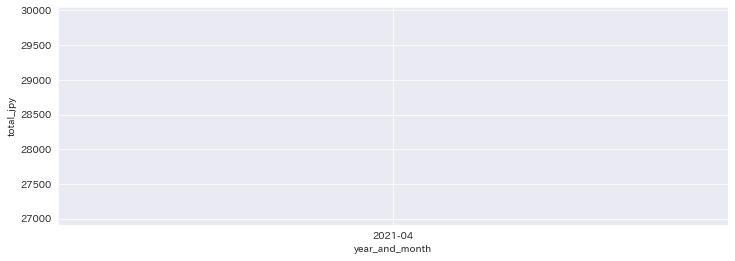

In [20]:
df_by_month["year_and_month"] = df_by_month.index
sns.lineplot(data=df_by_month, x='year_and_month', y='total_jpy')